In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'


In [3]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('final1.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
LAX = df[df['ORIGIN_STATE_ABR'] == 'CA']
LAX

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
0,1,1,24,4,2019-01-24,B6,1224,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1637.0,-10.0,37.0,-24.0,0.0,279.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
2,1,1,24,4,2019-01-24,B6,1424,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2129.0,14.0,543.0,10.0,0.0,289.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
7,1,1,24,4,2019-01-24,B6,2024,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,113.0,36.0,937.0,38.0,0.0,305.0,2475.0,36.0,0.0,2.0,0.0,0.0,True,False,False,2,True,False,True,False,False
9,1,1,25,5,2019-01-25,B6,24,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,533.0,-7.0,1338.0,-20.0,0.0,286.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
11,1,1,25,5,2019-01-25,B6,124,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,651.0,-9.0,1502.0,-15.0,0.0,292.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35562,4,12,8,7,2019-12-08,UA,2304,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,918.0,-7.0,1719.0,-25.0,0.0,267.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35564,4,12,8,7,2019-12-08,UA,2041,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,612.0,-3.0,1406.0,-17.0,0.0,263.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35566,4,12,8,7,2019-12-08,UA,1960,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1611.0,-4.0,2346.0,-39.0,0.0,252.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35567,4,12,8,7,2019-12-08,UA,1882,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2119.0,4.0,446.0,-22.0,0.0,242.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False


# Airport: LAX

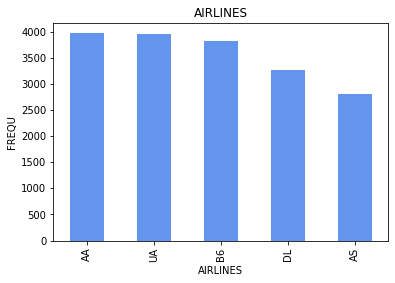

<Figure size 1296x360 with 0 Axes>

In [7]:
Airlines(LAX['OP_UNIQUE_CARRIER'])

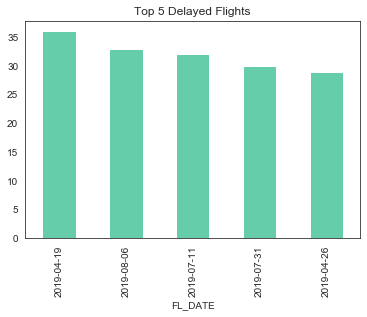

In [140]:
LAX[LAX['ARR_DELAY'] > 14].groupby(['FL_DATE']).size().nlargest(5).plot(kind='bar',color='mediumaquamarine', title='Top 5 Delayed Flights')

In [9]:
LAX['QUARTER'].value_counts()

4    4542
2    4515
3    4507
1    4250
Name: QUARTER, dtype: int64

In [10]:
LAX['AIR_TIME'].describe()

count    17814.000000
mean       284.044235
std         33.682242
min          0.000000
25%        276.000000
50%        287.000000
75%        297.000000
max        427.000000
Name: AIR_TIME, dtype: float64

In [11]:
LAX.groupby('OP_UNIQUE_CARRIER').agg({'AIR_TIME': ['mean']})

,AIR_TIME
,mean
OP_UNIQUE_CARRIER,
AA,288.550403
AS,286.879047
B6,289.629222
DL,284.389467
UA,271.814937


In [12]:
LAX[LAX['AIR_TIME']==LAX['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
16199,3,8,8,4,2019-08-08,AA,274,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1225.0,25.0,2307.0,136.0,0.0,427.0,2475.0,9.0,0.0,111.0,0.0,16.0,True,False,False,2,True,False,True,False,True


In [13]:
late2 =LAX[(LAX['DEP_TIME'] > 0) & (LAX['CANCELLED'] ==1)]
late2

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
7899,2,4,29,1,2019-04-29,AA,2,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,855.0,-5.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
16404,3,8,30,5,2019-08-30,AA,2201,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1458.0,-2.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
28080,2,4,27,6,2019-04-27,UA,415,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2307.0,-8.0,0.0,0.0,1.0,0.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
30933,3,7,6,6,2019-07-06,UA,642,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1345.0,210.0,0.0,0.0,1.0,0.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,True,1,False,False,False,False,False


# Flight Statises by Airline

In [14]:
AA= LAX[LAX['OP_UNIQUE_CARRIER'] == 'AA']
AS=LAX[LAX['OP_UNIQUE_CARRIER'] == 'AS']
B6=LAX[LAX['OP_UNIQUE_CARRIER'] == 'B6']
DL=LAX[LAX['OP_UNIQUE_CARRIER'] == 'DL']
UA=LAX[LAX['OP_UNIQUE_CARRIER'] == 'UA']

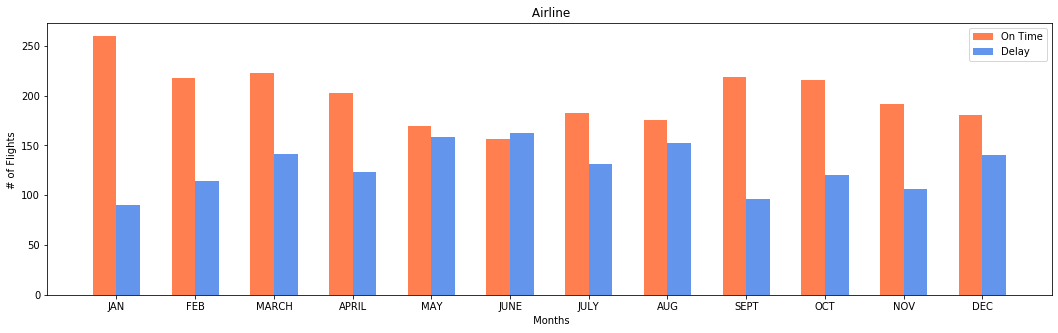

In [15]:
airline(AA)

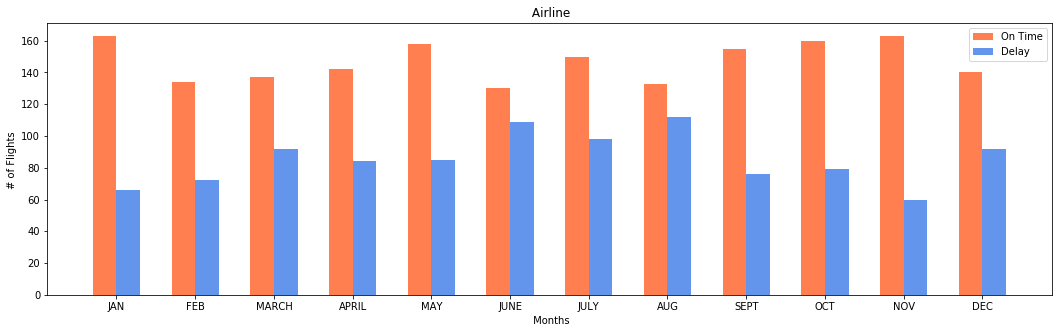

In [16]:
airline(AS)

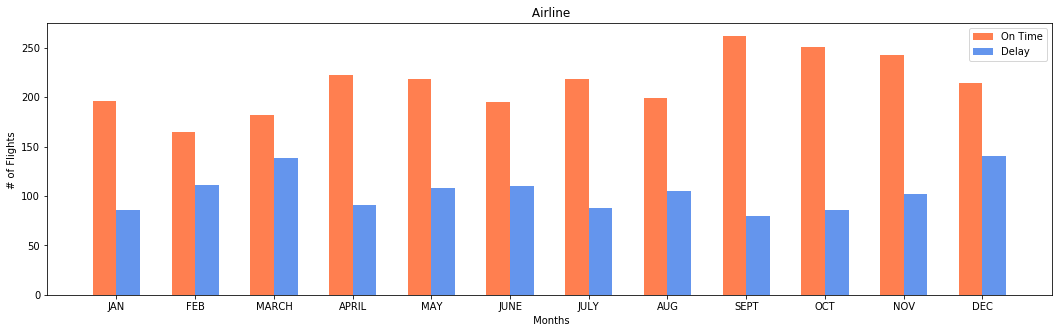

In [17]:
airline(B6)

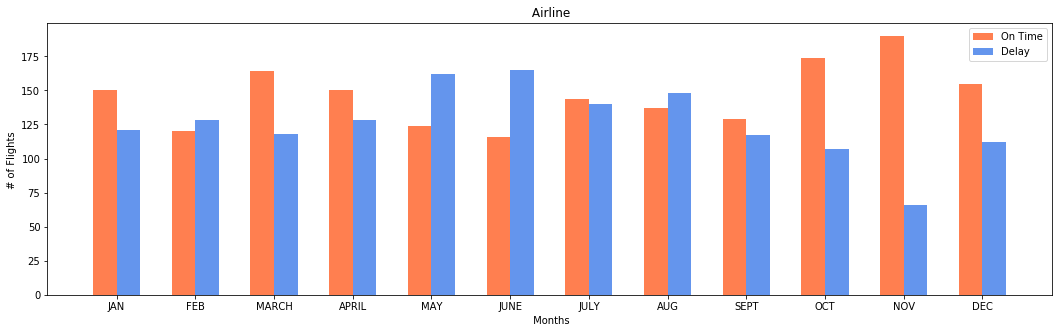

In [18]:
airline(DL)

In [21]:
AUG = DL[DL['MONTH'] == 8] 
AUG['class'].value_counts()

2    148
3    137
Name: class, dtype: int64

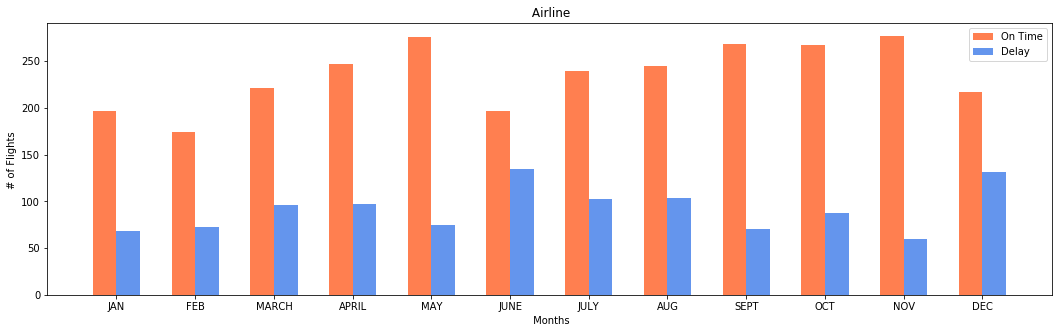

In [19]:
airline(UA)

# American Airline

In [22]:
AA

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
31,1,1,1,2,2019-01-01,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1256.0,-4.0,2057.0,-24.0,0.0,279.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
32,1,1,2,3,2019-01-02,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1307.0,7.0,2121.0,0.0,0.0,288.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
33,1,1,3,4,2019-01-03,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1256.0,-4.0,2117.0,-4.0,0.0,296.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
34,1,1,4,5,2019-01-04,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1257.0,-3.0,2128.0,7.0,0.0,299.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35,1,1,5,6,2019-01-05,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1256.0,-4.0,2111.0,-10.0,0.0,271.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24982,4,12,20,5,2019-12-20,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,37.0,7.0,908.0,20.0,0.0,301.0,2475.0,7.0,0.0,13.0,0.0,0.0,True,False,False,2,True,False,True,False,False
24983,4,12,21,6,2019-12-21,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,40.0,10.0,922.0,34.0,0.0,297.0,2475.0,10.0,0.0,24.0,0.0,0.0,True,False,False,2,True,False,True,False,False
24984,4,12,22,7,2019-12-22,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,25.0,-5.0,918.0,30.0,0.0,318.0,2475.0,0.0,0.0,30.0,0.0,0.0,False,True,False,3,False,False,True,False,False
24985,4,12,23,1,2019-12-23,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,28.0,-2.0,953.0,65.0,0.0,312.0,2475.0,0.0,0.0,65.0,0.0,0.0,False,True,False,3,False,False,True,False,False


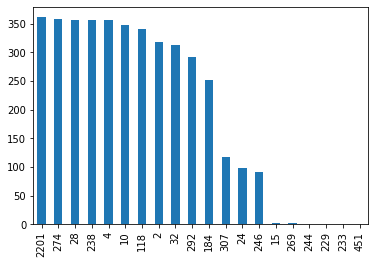

In [23]:
AA['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

In [24]:
AA[AA['AIR_TIME']==AA['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
16199,3,8,8,4,2019-08-08,AA,274,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1225.0,25.0,2307.0,136.0,0.0,427.0,2475.0,9.0,0.0,111.0,0.0,16.0,True,False,False,2,True,False,True,False,True


In [25]:
AA[AA['ARR_DELAY']==AA['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
12659,2,6,7,5,2019-06-07,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1234.0,724.0,2058.0,708.0,0.0,299.0,2475.0,708.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False


In [27]:
AAdelays = LAX[(LAX['class'] ==2 ) & (LAX['OP_UNIQUE_CARRIER'] =='AA') & (LAX['ARR_DELAY'] > 14)]
AAdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
45,1,1,15,2,2019-01-15,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1628.0,208.0,39.0,190.0,0.0,280.0,2475.0,0.0,0.0,0.0,0.0,190.0,True,False,False,2,False,False,False,False,True
53,1,1,24,4,2019-01-24,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1406.0,66.0,2211.0,42.0,0.0,286.0,2475.0,0.0,0.0,42.0,0.0,0.0,True,False,False,2,False,False,True,False,False
60,1,1,31,4,2019-01-31,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1338.0,38.0,2159.0,30.0,0.0,292.0,2475.0,7.0,0.0,0.0,0.0,23.0,True,False,False,2,True,False,False,False,True
92,1,1,4,5,2019-01-04,AA,274,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1204.0,4.0,2056.0,33.0,0.0,303.0,2475.0,3.0,0.0,29.0,0.0,1.0,True,False,False,2,True,False,True,False,True
100,1,1,12,6,2019-01-12,AA,274,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1202.0,2.0,2048.0,18.0,0.0,309.0,2475.0,2.0,0.0,16.0,0.0,0.0,True,False,False,2,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,4,12,14,6,2019-12-14,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,38.0,3.0,935.0,40.0,0.0,297.0,2475.0,0.0,0.0,40.0,0.0,0.0,True,False,False,2,False,False,True,False,False
24981,4,12,19,4,2019-12-19,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,55.0,25.0,914.0,26.0,0.0,295.0,2475.0,25.0,0.0,1.0,0.0,0.0,True,False,False,2,True,False,True,False,False
24982,4,12,20,5,2019-12-20,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,37.0,7.0,908.0,20.0,0.0,301.0,2475.0,7.0,0.0,13.0,0.0,0.0,True,False,False,2,True,False,True,False,False
24983,4,12,21,6,2019-12-21,AA,292,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,40.0,10.0,922.0,34.0,0.0,297.0,2475.0,10.0,0.0,24.0,0.0,0.0,True,False,False,2,True,False,True,False,False


In [28]:
AA[(AA['class'] ==2 )  & (AA['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
13012,3,7,2,2,2019-07-02,AA,274,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1226.0,11.0,2246.0,107.0,0.0,389.0,2475.0,0.0,0.0,96.0,11.0,0.0,True,False,False,2,False,False,True,True,False
16088,3,8,22,4,2019-08-22,AA,184,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1736.0,66.0,229.0,82.0,0.0,325.0,2475.0,0.0,0.0,16.0,66.0,0.0,True,False,False,2,False,False,True,True,False
16147,3,8,18,7,2019-08-18,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1054.0,44.0,1935.0,28.0,0.0,307.0,2475.0,0.0,0.0,0.0,28.0,0.0,True,False,False,2,False,False,False,True,False


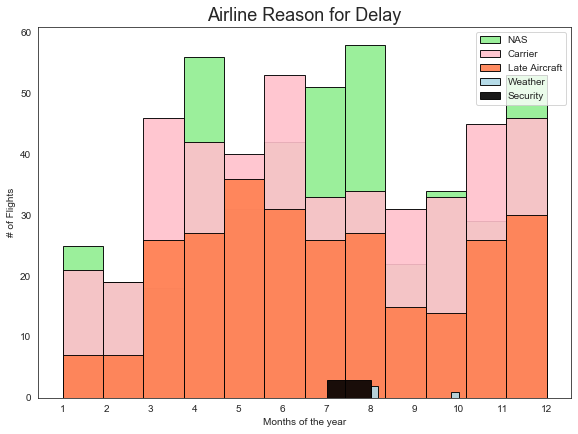

In [29]:
delays(AA)

In [30]:
AA[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          443
delay_weather            3
delay_nas              438
delay_security           3
delay_late_aircraft    272
dtype: int64

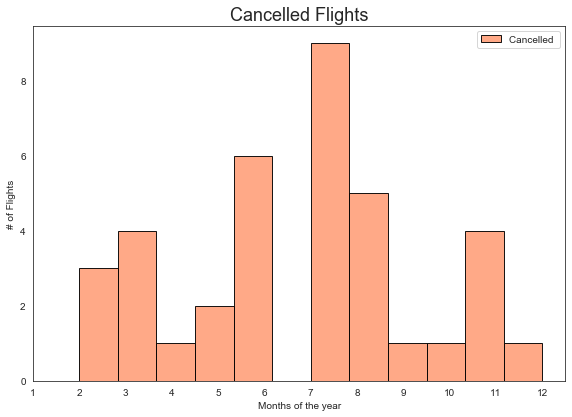

In [31]:
cancellation(AA)

# Alaska Airlines

In [33]:
AS

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
482,1,1,22,2,2019-01-22,AS,1406,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1035.0,0.0,1844.0,-16.0,0.0,287.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
484,1,1,22,2,2019-01-22,AS,1412,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1330.0,-5.0,2152.0,-8.0,0.0,287.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
486,1,1,22,2,2019-01-22,AS,1416,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1540.0,0.0,2340.0,-15.0,0.0,282.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
489,1,1,23,3,2019-01-23,AS,72,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2319.0,-16.0,819.0,24.0,0.0,323.0,2475.0,0.0,0.0,24.0,0.0,0.0,False,True,False,3,False,False,True,False,False
490,1,1,23,3,2019-01-23,AS,94,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2104.0,-10.0,538.0,9.0,0.0,296.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35211,4,12,30,1,2019-12-30,AS,512,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,737.0,32.0,1548.0,22.0,0.0,283.0,2454.0,0.0,0.0,22.0,0.0,0.0,True,False,False,2,False,False,True,False,False
35212,4,12,30,1,2019-12-30,AS,546,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,958.0,23.0,1816.0,20.0,0.0,287.0,2454.0,0.0,0.0,20.0,0.0,0.0,True,False,False,2,False,False,True,False,False
35213,4,12,30,1,2019-12-30,AS,556,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2218.0,-2.0,634.0,-6.0,0.0,288.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35217,4,12,31,2,2019-12-31,AS,512,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,703.0,-2.0,1530.0,4.0,0.0,298.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


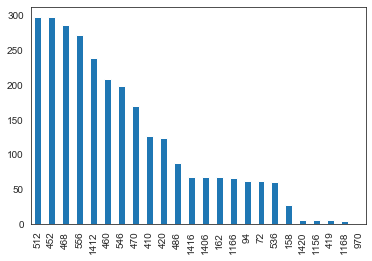

In [34]:
AS['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

In [35]:
AS[AS['AIR_TIME']==AS['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
15170,3,8,19,1,2019-08-19,AS,452,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1104.0,34.0,2112.0,122.0,0.0,399.0,2475.0,34.0,0.0,88.0,0.0,0.0,True,False,False,2,True,False,True,False,False


In [36]:
AS[AS['ARR_DELAY']==AS['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
30208,2,6,29,6,2019-06-29,AS,546,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1629.0,404.0,39.0,379.0,0.0,286.0,2454.0,0.0,0.0,379.0,0.0,0.0,True,False,False,2,False,False,True,False,False


In [37]:
ASdelays = AS[(AS['class'] ==2 ) & (AS['ARR_DELAY'] > 14)]
ASdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
492,1,1,23,3,2019-01-23,AS,1406,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1105.0,30.0,1919.0,19.0,0.0,291.0,2475.0,19.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
502,1,1,24,4,2019-01-24,AS,1406,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1119.0,44.0,1938.0,38.0,0.0,281.0,2475.0,0.0,0.0,38.0,0.0,0.0,True,False,False,2,False,False,True,False,False
609,1,1,26,6,2019-01-26,AS,1416,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1555.0,15.0,12.0,17.0,0.0,302.0,2475.0,15.0,0.0,2.0,0.0,0.0,True,False,False,2,True,False,True,False,False
681,1,1,14,1,2019-01-14,AS,1412,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1342.0,7.0,2239.0,39.0,0.0,304.0,2475.0,0.0,0.0,32.0,0.0,7.0,True,False,False,2,False,False,True,False,True
683,1,1,14,1,2019-01-14,AS,1416,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1616.0,36.0,12.0,17.0,0.0,277.0,2475.0,17.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35171,4,12,11,3,2019-12-11,AS,546,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1034.0,59.0,1839.0,43.0,0.0,277.0,2454.0,0.0,0.0,43.0,0.0,0.0,True,False,False,2,False,False,True,False,False
35191,4,12,26,4,2019-12-26,AS,556,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2307.0,47.0,708.0,28.0,0.0,273.0,2454.0,0.0,0.0,0.0,0.0,28.0,True,False,False,2,False,False,False,False,True
35207,4,12,29,7,2019-12-29,AS,556,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2303.0,43.0,731.0,51.0,0.0,290.0,2454.0,43.0,0.0,8.0,0.0,0.0,True,False,False,2,True,False,True,False,False
35211,4,12,30,1,2019-12-30,AS,512,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,737.0,32.0,1548.0,22.0,0.0,283.0,2454.0,0.0,0.0,22.0,0.0,0.0,True,False,False,2,False,False,True,False,False


In [38]:
AS[(AS['class'] ==2 )  & (AS['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
22659,4,11,22,5,2019-11-22,AS,452,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1047.0,7.0,1931.0,22.0,0.0,308.0,2475.0,0.0,0.0,15.0,7.0,0.0,True,False,False,2,False,False,True,True,False


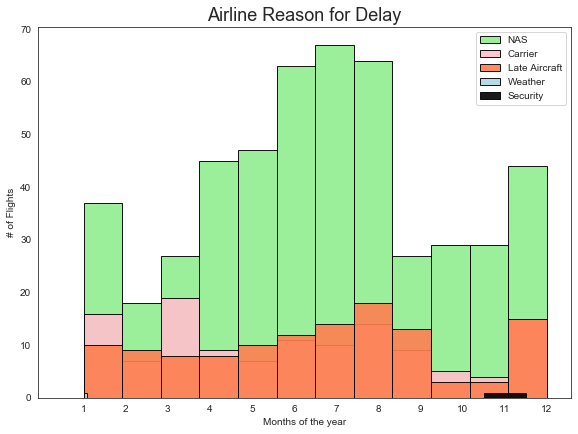

In [39]:
delays(AS)

In [40]:
AS[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          126
delay_weather            1
delay_nas              497
delay_security           1
delay_late_aircraft    123
dtype: int64

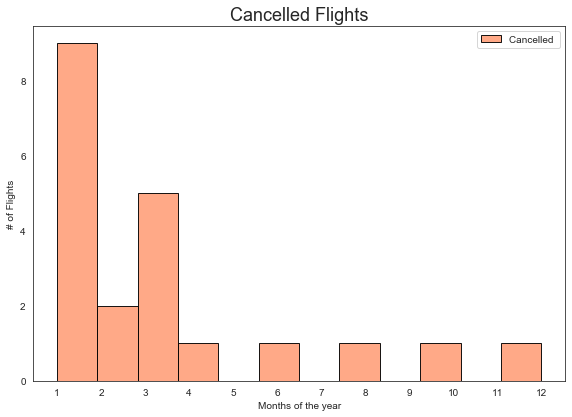

In [41]:
cancellation(AS)

# JetBlue

In [42]:
B6

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
0,1,1,24,4,2019-01-24,B6,1224,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1637.0,-10.0,37.0,-24.0,0.0,279.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
2,1,1,24,4,2019-01-24,B6,1424,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2129.0,14.0,543.0,10.0,0.0,289.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
7,1,1,24,4,2019-01-24,B6,2024,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,113.0,36.0,937.0,38.0,0.0,305.0,2475.0,36.0,0.0,2.0,0.0,0.0,True,False,False,2,True,False,True,False,False
9,1,1,25,5,2019-01-25,B6,24,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,533.0,-7.0,1338.0,-20.0,0.0,286.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
11,1,1,25,5,2019-01-25,B6,124,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,651.0,-9.0,1502.0,-15.0,0.0,292.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25659,4,12,31,2,2019-12-31,B6,24,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,536.0,6.0,1414.0,26.0,0.0,316.0,2475.0,6.0,0.0,20.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25661,4,12,31,2,2019-12-31,B6,124,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,650.0,-10.0,1448.0,-31.0,0.0,281.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25662,4,12,31,2,2019-12-31,B6,224,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,800.0,-10.0,1609.0,-21.0,0.0,286.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25663,4,12,31,2,2019-12-31,B6,324,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,959.0,-9.0,1819.0,-11.0,0.0,295.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


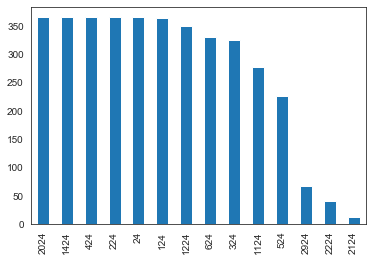

In [43]:
B6['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

In [46]:
B6[B6['AIR_TIME']==B6['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
15624,3,8,8,4,2019-08-08,B6,424,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1114.0,-3.0,2107.0,62.0,0.0,390.0,2475.0,0.0,0.0,62.0,0.0,0.0,False,True,False,3,False,False,True,False,False


In [47]:
B6[B6['ARR_DELAY']==B6['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
19740,4,10,17,4,2019-10-17,B6,324,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1736.0,476.0,219.0,480.0,0.0,308.0,2475.0,0.0,0.0,470.0,0.0,10.0,True,False,False,2,False,False,True,False,True


In [48]:
B6delays = B6[(B6['class'] ==2 ) & (B6['ARR_DELAY'] > 14)]
B6delays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
7,1,1,24,4,2019-01-24,B6,2024,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,113.0,36.0,937.0,38.0,0.0,305.0,2475.0,36.0,0.0,2.0,0.0,0.0,True,False,False,2,True,False,True,False,False
27,1,1,25,5,2019-01-25,B6,2024,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,134.0,57.0,952.0,53.0,0.0,292.0,2475.0,1.0,0.0,0.0,0.0,52.0,True,False,False,2,True,False,False,False,True
288,1,1,4,5,2019-01-04,B6,324,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1041.0,21.0,1909.0,27.0,0.0,294.0,2475.0,21.0,0.0,6.0,0.0,0.0,True,False,False,2,True,False,True,False,False
572,1,1,31,4,2019-01-31,B6,424,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1141.0,1.0,2027.0,24.0,0.0,307.0,2475.0,1.0,0.0,23.0,0.0,0.0,True,False,False,2,True,False,True,False,False
811,1,1,11,5,2019-01-11,B6,224,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,829.0,24.0,1702.0,35.0,0.0,288.0,2475.0,0.0,0.0,35.0,0.0,0.0,True,False,False,2,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25624,4,12,19,4,2019-12-19,B6,2124,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1911.0,126.0,321.0,121.0,0.0,291.0,2475.0,45.0,0.0,0.0,0.0,76.0,True,False,False,2,True,False,False,False,True
25634,4,12,29,7,2019-12-29,B6,2024,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,47.0,17.0,908.0,18.0,0.0,286.0,2475.0,0.0,0.0,1.0,0.0,17.0,True,False,False,2,False,False,True,False,True
25636,4,12,29,7,2019-12-29,B6,2124,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1843.0,98.0,258.0,98.0,0.0,298.0,2475.0,0.0,0.0,2.0,0.0,96.0,True,False,False,2,False,False,True,False,True
25656,4,12,30,1,2019-12-30,B6,2124,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1901.0,116.0,245.0,85.0,0.0,270.0,2475.0,4.0,0.0,0.0,0.0,81.0,True,False,False,2,True,False,False,False,True


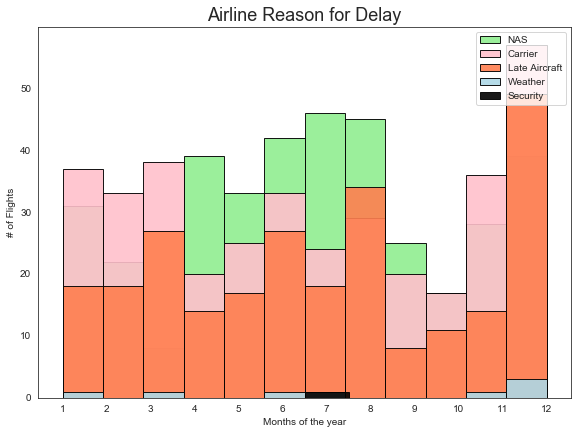

In [49]:
delays(B6)

In [50]:
B6[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          369
delay_weather            8
delay_nas              375
delay_security           1
delay_late_aircraft    255
dtype: int64

# Delta Airlines

In [51]:
DL

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
405,1,1,18,5,2019-01-18,DL,40,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,930.0,0.0,1733.0,-26.0,0.0,281.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
408,1,1,18,5,2019-01-18,DL,468,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1416.0,-9.0,2227.0,-23.0,0.0,280.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
414,1,1,18,5,2019-01-18,DL,1862,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1203.0,23.0,2034.0,21.0,0.0,281.0,2475.0,9.0,0.0,0.0,0.0,12.0,True,False,False,2,True,False,False,False,True
415,1,1,18,5,2019-01-18,DL,1876,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,612.0,-3.0,1417.0,-24.0,0.0,279.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
416,1,1,18,5,2019-01-18,DL,1891,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,753.0,-2.0,1557.0,-31.0,0.0,284.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25294,4,12,11,3,2019-12-11,DL,2164,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,923.0,-2.0,1731.0,-13.0,0.0,286.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25295,4,12,11,3,2019-12-11,DL,2262,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1525.0,75.0,2342.0,76.0,0.0,286.0,2475.0,0.0,0.0,1.0,0.0,75.0,True,False,False,2,False,False,True,False,True
25297,4,12,11,3,2019-12-11,DL,2686,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1605.0,0.0,2353.0,-31.0,0.0,271.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25298,4,12,11,3,2019-12-11,DL,2815,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2100.0,0.0,501.0,-16.0,0.0,273.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


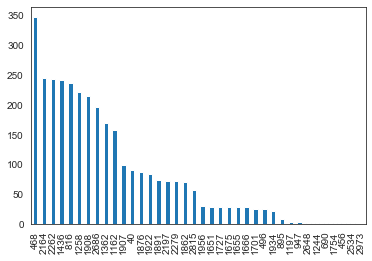

In [52]:
DL['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

In [53]:
DL[DL['AIR_TIME']==DL['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
13373,3,7,17,3,2019-07-17,DL,468,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1240.0,0.0,2246.0,74.0,0.0,392.0,2475.0,0.0,0.0,74.0,0.0,0.0,False,True,False,3,False,False,True,False,False


In [54]:
DL[DL['ARR_DELAY']==DL['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
4001,1,2,24,7,2019-02-24,DL,1891,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,408.0,1213.0,1231.0,1203.0,0.0,276.0,2475.0,1203.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False


In [55]:
DL[(DL['class'] ==2 )  & (DL['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
7646,2,4,22,1,2019-04-22,DL,1655,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2213.0,73.0,630.0,63.0,0.0,296.0,2475.0,3.0,0.0,0.0,60.0,0.0,True,False,False,2,True,False,False,True,False


In [56]:
DLdelays = DL[(DL['class'] ==2 ) & (DL['ARR_DELAY'] > 14)]
DLdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
414,1,1,18,5,2019-01-18,DL,1862,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1203.0,23.0,2034.0,21.0,0.0,281.0,2475.0,9.0,0.0,0.0,0.0,12.0,True,False,False,2,True,False,False,False,True
417,1,1,18,5,2019-01-18,DL,1907,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1728.0,78.0,146.0,79.0,0.0,288.0,2475.0,78.0,0.0,1.0,0.0,0.0,True,False,False,2,True,False,True,False,False
424,1,1,18,5,2019-01-18,DL,2279,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,38.0,102.0,852.0,92.0,0.0,284.0,2475.0,14.0,0.0,0.0,0.0,78.0,True,False,False,2,True,False,False,False,True
432,1,1,19,6,2019-01-19,DL,1876,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,657.0,42.0,1520.0,44.0,0.0,291.0,2475.0,42.0,0.0,2.0,0.0,0.0,True,False,False,2,True,False,True,False,False
441,1,1,13,7,2019-01-13,DL,468,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1707.0,162.0,57.0,127.0,0.0,273.0,2475.0,31.0,0.0,0.0,0.0,96.0,True,False,False,2,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25223,4,12,28,6,2019-12-28,DL,1908,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2301.0,16.0,749.0,49.0,0.0,282.0,2475.0,16.0,0.0,33.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25244,4,12,29,7,2019-12-29,DL,2815,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2134.0,34.0,542.0,25.0,0.0,274.0,2475.0,25.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25285,4,12,11,3,2019-12-11,DL,468,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1344.0,64.0,2148.0,48.0,0.0,282.0,2475.0,0.0,17.0,0.0,0.0,31.0,True,False,False,2,False,True,False,False,True
25286,4,12,11,3,2019-12-11,DL,816,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1215.0,45.0,2032.0,34.0,0.0,285.0,2475.0,0.0,0.0,0.0,0.0,34.0,True,False,False,2,False,False,False,False,True


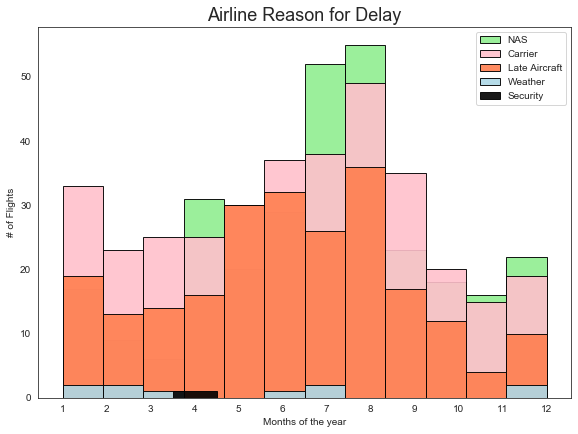

In [57]:
delays(DL)

In [58]:
DL[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          349
delay_weather           10
delay_nas              298
delay_security           1
delay_late_aircraft    229
dtype: int64

# United Airlines

In [59]:
UA

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25668,1,1,26,6,2019-01-26,UA,642,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1016.0,1.0,1838.0,9.0,0.0,296.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
25670,1,1,26,6,2019-01-26,UA,510,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1307.0,-8.0,2123.0,-11.0,0.0,293.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25671,1,1,26,6,2019-01-26,UA,415,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2308.0,-7.0,710.0,0.0,0.0,279.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25672,1,1,26,6,2019-01-26,UA,247,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,708.0,-7.0,1542.0,9.0,0.0,294.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25674,1,1,25,5,2019-01-25,UA,2418,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,823.0,8.0,1613.0,-6.0,0.0,264.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35562,4,12,8,7,2019-12-08,UA,2304,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,918.0,-7.0,1719.0,-25.0,0.0,267.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35564,4,12,8,7,2019-12-08,UA,2041,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,612.0,-3.0,1406.0,-17.0,0.0,263.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35566,4,12,8,7,2019-12-08,UA,1960,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1611.0,-4.0,2346.0,-39.0,0.0,252.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35567,4,12,8,7,2019-12-08,UA,1882,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2119.0,4.0,446.0,-22.0,0.0,242.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False


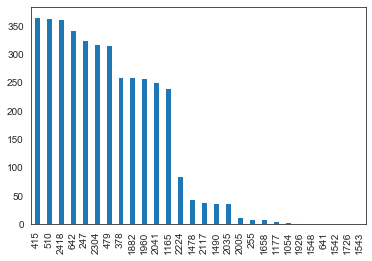

In [60]:
UA['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

In [62]:
UA[UA['AIR_TIME']==UA['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
30622,3,7,11,4,2019-07-11,UA,642,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1013.0,-2.0,2051.0,115.0,0.0,415.0,2454.0,0.0,0.0,115.0,0.0,0.0,False,True,False,3,False,False,True,False,False


In [63]:
UA[UA['ARR_DELAY']==UA['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
26795,1,2,14,4,2019-02-14,UA,642,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,602.0,1172.0,1359.0,1153.0,0.0,271.0,2454.0,815.0,0.0,0.0,0.0,338.0,True,False,False,2,True,False,False,False,True


In [64]:
UA[(UA['class'] ==2 )  & (UA['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft


In [65]:
UAdelays = UA[(UA['class'] ==2 ) & (UA['ARR_DELAY'] > 14)]
UAdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25676,1,1,25,5,2019-01-25,UA,2224,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2147.0,42.0,558.0,48.0,0.0,286.0,2454.0,42.0,0.0,6.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25701,1,1,12,6,2019-01-12,UA,510,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1316.0,1.0,2154.0,20.0,0.0,275.0,2454.0,0.0,0.0,20.0,0.0,0.0,True,False,False,2,False,False,True,False,False
25721,1,1,10,4,2019-01-10,UA,2418,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,851.0,36.0,1654.0,35.0,0.0,278.0,2454.0,35.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25725,1,1,10,4,2019-01-10,UA,2035,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1709.0,54.0,109.0,35.0,0.0,274.0,2454.0,35.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25734,1,1,10,4,2019-01-10,UA,415,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,10.0,55.0,818.0,68.0,0.0,258.0,2454.0,53.0,0.0,13.0,0.0,2.0,True,False,False,2,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35518,4,12,10,2,2019-12-10,UA,2304,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,927.0,2.0,1802.0,18.0,0.0,274.0,2454.0,0.0,0.0,18.0,0.0,0.0,True,False,False,2,False,False,True,False,False
35540,4,12,9,1,2019-12-09,UA,2304,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1104.0,99.0,1923.0,99.0,0.0,272.0,2454.0,0.0,0.0,99.0,0.0,0.0,True,False,False,2,False,False,True,False,False
35550,4,12,9,1,2019-12-09,UA,642,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1258.0,163.0,2113.0,159.0,0.0,273.0,2454.0,0.0,0.0,159.0,0.0,0.0,True,False,False,2,False,False,True,False,False
35552,4,12,9,1,2019-12-09,UA,510,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1543.0,208.0,2327.0,182.0,0.0,264.0,2454.0,0.0,0.0,182.0,0.0,0.0,True,False,False,2,False,False,True,False,False


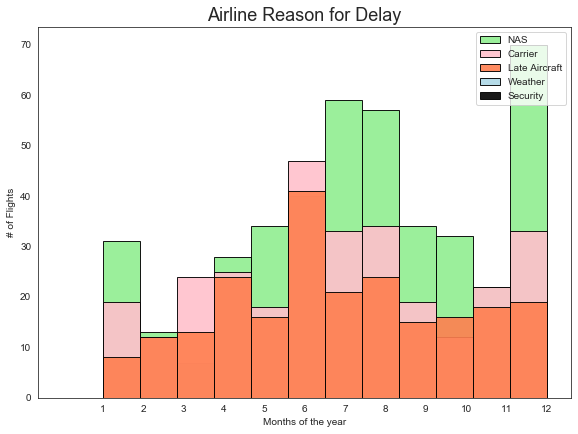

In [66]:
delays(UA)

In [67]:
UA[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          298
delay_weather            0
delay_nas              427
delay_security           0
delay_late_aircraft    227
dtype: int64

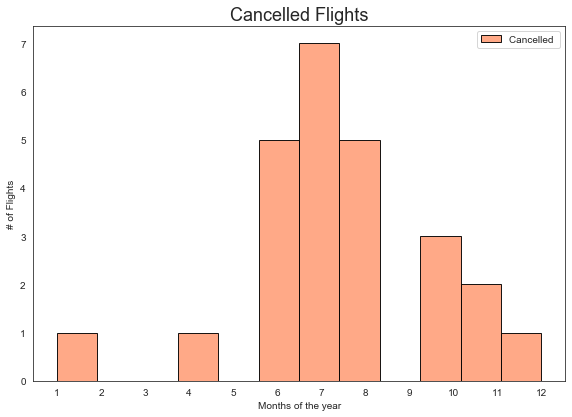

In [68]:
cancellation(UA)

# Holiday Delays

In [70]:
delay = LAX[LAX['ARR_DELAY'] > 13].groupby(['OP_UNIQUE_CARRIER']).size()
delay

OP_UNIQUE_CARRIER
AA    772
AS    648
B6    663
DL    596
UA    697
dtype: int64

In [134]:
LAX[(LAX['ARR_DELAY'] >14 ) & (LAX['DAY_OF_MONTH'] == 29) & (LAX['MONTH'] == 11)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
21992,4,11,29,5,2019-11-29,B6,1224,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2120.0,50.0,517.0,33.0,0.0,270.0,2475.0,26.0,0.0,0.0,0.0,7.0,True,False,False,2,True,False,False,False,True
21994,4,11,29,5,2019-11-29,B6,1424,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2310.0,-5.0,751.0,20.0,0.0,288.0,2475.0,0.0,0.0,20.0,0.0,0.0,False,True,False,3,False,False,True,False,False
22001,4,11,29,5,2019-11-29,B6,2224,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1457.0,56.0,2245.0,24.0,0.0,266.0,2475.0,24.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
34502,4,11,29,5,2019-11-29,UA,415,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2330.0,15.0,730.0,21.0,0.0,239.0,2454.0,15.0,0.0,6.0,0.0,0.0,True,False,False,2,True,False,True,False,False


In [74]:
LAX[(LAX['FL_DATE'] =='2019-11-27' ) & (LAX['ARR_DELAY'] > 20)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
21514,4,11,27,3,2019-11-27,AA,238,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1048.0,33.0,1901.0,24.0,0.0,270.0,2475.0,24.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
22598,4,11,27,3,2019-11-27,B6,424,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1237.0,63.0,2034.0,34.0,0.0,261.0,2475.0,8.0,0.0,0.0,0.0,26.0,True,False,False,2,True,False,False,False,True
23043,4,11,27,3,2019-11-27,DL,816,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1226.0,71.0,2013.0,22.0,0.0,260.0,2475.0,2.0,0.0,0.0,0.0,20.0,True,False,False,2,True,False,False,False,True


In [102]:
LAX[(LAX['FL_DATE'] =='2019-11-30' ) & (LAX['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    1
DL    3
UA    2
dtype: int64

In [76]:

LAX[LAX['FL_DATE'] =='2019-12-29'].groupby(['OP_UNIQUE_CARRIER']).size()


OP_UNIQUE_CARRIER
AA     8
AS     8
B6    10
DL     8
UA    13
dtype: int64

In [98]:
LAX[(LAX['FL_DATE'] =='2019-12-22' ) & (LAX['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()


OP_UNIQUE_CARRIER
AA    6
AS    5
B6    2
DL    1
UA    6
dtype: int64

In [78]:
LAX[(LAX['FL_DATE'] =='2019-12-30' ) & (LAX['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()


OP_UNIQUE_CARRIER
AA    3
AS    3
B6    2
DL    1
UA    3
dtype: int64

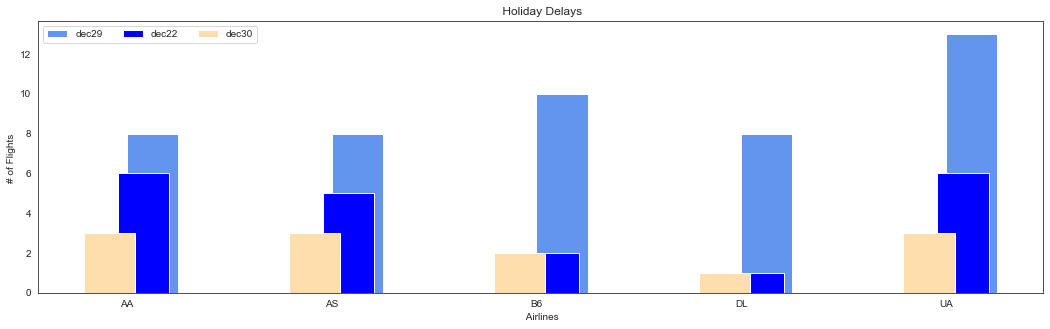

In [114]:
f, ax = plt.subplots(figsize=(18,5)) 

    ### Setting the labels of the X axis
labels = ['AA','AS','B6','DL','UA']

#nov27 = LAX[(LAX['FL_DATE'] =='2019-11-27' ) & (LAX['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
dec29 = LAX[LAX['FL_DATE'] =='2019-12-29'].groupby(['OP_UNIQUE_CARRIER']).size()
dec22 = LAX[(LAX['FL_DATE'] =='2019-12-22' ) & (LAX['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
dec30 = LAX[(LAX['FL_DATE'] =='2019-12-30' ) & (LAX['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
    ### X- Label locations 
x = np.arange(len(labels))
    ### Width of the bars
width = 0.25  
    ### Code to plot the bars 
#rect1= ax.bar(x - width/2, nov27, width, label = 'nov27',color = 'coral')
rect2= ax.bar(x + width/2, dec29, width, label = 'dec29',color = 'cornflowerblue')
rect3= ax.bar(x + width/3, dec22, width, label = 'dec22',color = 'blue')
rect4= ax.bar(x - width/3, dec30, width, label = 'dec30',color = 'navajowhite')
    ### Set the x-ticks
ax.set_xticks(x)
    ### Setting labels 
ax.set_xticklabels(labels)
    ### Labeling the X axis
ax.set_xlabel(" Airlines")
    ### Y axis Label
ax.set_ylabel("# of Flights ")
    ### Title of Graoh
ax.set_title(" Holiday Delays")
    ### Showing the legend 
ax.legend(ncol=4)
    ### Show graph
plt.show()

In [135]:
LAX[LAX['WEATHER_DELAY'] > 0].groupby(['FL_DATE']).size().nlargest()


FL_DATE
2019-01-31    2
2019-12-03    2
2019-01-06    1
2019-01-22    1
2019-02-12    1
dtype: int64